In [1]:
#=============================================================================#
#                            Importing packages                               #
#=============================================================================#
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [2]:
#=============================================================================#
#                                Ising Matrix                                  #
#=============================================================================#
# Two-Heirs problem parameters
v0=1 ; v1=3 ; v2=1
# Pauli Matrix and Identity
I = np.eye(2)
X = np.matrix([[0,1],[1,0]])
Z = np.matrix([[1,0],[0,-1]])

# Mapping of our problem into Ising
Ising = np.matrix([[0, 2*v0*v1, 2*v0*v2],[0, 0, 2*v1*v2],[0,0,0]])

In [3]:
#=============================================================================#
#                                OUTER PRODUCTS                               #
#=============================================================================#
# Z
Z0Z1 = np.kron(Z, np.kron(Z, I))
Z0Z2 = np.kron(Z, np.kron(I, Z))
Z1Z2 = np.kron(I, np.kron(Z, Z))

# X
X0 = np.kron(X, np.kron(I, I))
X1 = np.kron(I, np.kron(X, I))
X2 = np.kron(I, np.kron(I, X))


In [4]:
#=============================================================================#
#                                 Hamiltonians                                #
#=============================================================================#
H_Ising = Ising[0,1]*Z0Z1 + Ising[0,2]*Z0Z2 + Ising[1,2]*Z1Z2
H_ini = -X0 - X1 - X2

# Eigenvectors
In a 3-qubit Hilbert spaces the eigenvectors are -- we ommit to traspose the vector to save space --,
$$
\begin{align}
\ket{\uparrow,\uparrow,\uparrow} = (1,0,0,0,0,0,0,0) \\
\ket{\uparrow,\uparrow,\downarrow} = (0,1,0,0,0,0,0,0)\\
\ket{\uparrow,\downarrow,\uparrow} = (0,0,1,0,0,0,0,0)\\
\ket{\uparrow,\downarrow,\downarrow} = (0,0,0,1,0,0,0,0)\\
\ket{\downarrow,\uparrow,\uparrow} = (0,0,0,0,1,0,0,0)\\
\ket{\downarrow,\uparrow,\downarrow} = (0,0,0,0,0,1,0,0)\\
\ket{\downarrow,\downarrow,\uparrow} = (0,0,0,0,0,0,1,0)\\
\ket{\downarrow,\downarrow,\downarrow} = (0,0,0,0,0,0,0,1)
\end{align}
$$

In [5]:
# Check eigenvectors of Ising Hamiltonian
w, v = LA.eig(H_Ising)
print("eigenvalues:", w)
min_indices = np.where(w == w.min())[0] 
print("min_eigenvalues indices:", min_indices[0])
print("The associated eigenvectors")
for i in range(len(min_indices)):
    print(v[min_indices[i]])

eigenvalues: [ 14.  -2. -10.  -2.  -2. -10.  -2.  14.]
min_eigenvalues indices: 2
The associated eigenvectors
[[0. 0. 1. 0. 0. 0. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0. 0.]]


which corresponds to 
$$
\begin{align}
\ket{\uparrow,\downarrow,\uparrow} = (0,0,1,0,0,0,0,0)\\
\ket{\downarrow,\uparrow,\downarrow} = (0,0,0,0,0,1,0,0)\\
\end{align}
$$

In [6]:
T = 1
time = np.linspace(0, T, 100)
#H = (1-t/T)*H_ini + (t/T)*H_Ising
eigen_H = []
eigen_H_Ising = []
eigen_H_ini = []
for t in time:
    # Compute the Hamiltonian at that snapshot
    H = (1-t/T)*H_ini + (t/T)*H_Ising

    # Compute the ground eigenstate
    # Total Hamiltonian
    w, v = LA.eig(H)
    min_index = np.argmin(w)
    eigen_H.append(w[min_index])
    # Ising Hamiltonian
    w, v = LA.eig((t/T)*H_Ising)
    min_index = np.argmin(w)
    eigen_H_Ising.append(w[min_index])
    # Initial Hamiltonian
    w, v = LA.eig((1-t/T)*H_ini)
    min_index = np.argmin(w)
    eigen_H_ini.append(w[min_index])


/opt/homebrew/Caskroom/miniforge/base/envs/qc-hackathon/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


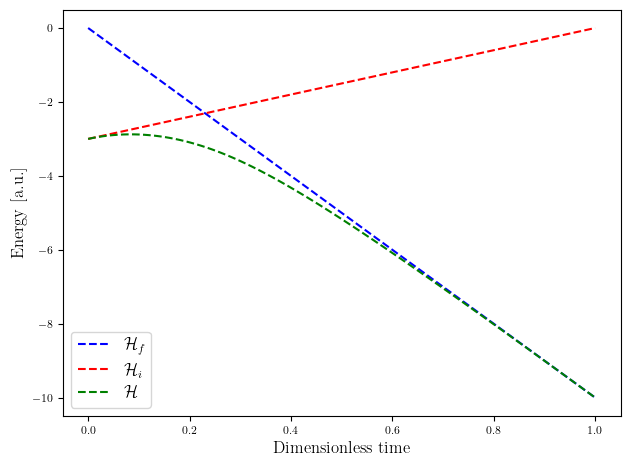

In [8]:
#=============================================================================#
#                                  Plotting                                   #
#=============================================================================#
def set_size(width,fraction=1, subplots=(1, 1), ratio=0):
    """
    Source: https://jwalton.info/Embed-Publication-Matplotlib-Latex/
    
    Set figure dimensions to avoid scaling in LaTeX.
    param width: float or string
            Document width in points, or string of predined document type
    param fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    param subplots: array-like, optional
            The number of rows and columns of subplots.
    returns:
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    if ratio == 0:
        golden_ratio = (5**.5 - 1) / 2
    else:
        golden_ratio = ratio  

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

# Latex Font See Ref. https://matplotlib.org/stable/tutorials/text/usetex.html
tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": True,
    "font.family": "serif",
    "font.sans-serif": "Palantino",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 12,
    "font.size": 12,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 12,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}

plt.style.use('default')
plt.rcParams.update(tex_fonts)

width = 'thesis'
fig, ax = plt.subplots(ncols=1)
fig.tight_layout(pad=1.5)


# Set names and Labels
ax.set_xlabel('Dimensionless time')
ax.set_ylabel('Energy [a.u.]')



ax.plot(time,eigen_H_Ising, 'b', linestyle = 'dashed', label=r'$\mathcal{H}_{f}$')
ax.plot(time,eigen_H_ini, 'r', linestyle = 'dashed', label=r'$\mathcal{H}_{i}$')
ax.plot(time,eigen_H, 'green', linestyle = 'dashed', label=r'$\mathcal{H}$')
ax.legend()

plt.savefig('Two-Heirs.pdf',  bbox_inches='tight')  
plt.show()
